In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np

# para checar quantidade de valores verdadeiros para cada poder
from collections import Counter

# sklearn

import sklearn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import export_graphviz
import graphviz 

from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clean_data = pd.read_csv('data/clean_data.csv')
clean_data_grouped = pd.read_csv('data/clean_data_grouped.csv')

clean_data_gender = pd.read_csv('data/clean_data_gender.csv')
clean_data_grouped_gender = pd.read_csv('data/clean_data_gender.csv')

clean_data_alignment = pd.read_csv('data/clean_data_alignment.csv')
clean_data_grouped_alignment = pd.read_csv('data/clean_data_grouped_alignment.csv')

clean_data_publisher = pd.read_csv('data/clean_data_publisher.csv')
clean_data_grouped_publisher = pd.read_csv('data/clean_data_grouped_publisher.csv')


clean_data_grouped_gender.head(3)

,Gender,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,...,Publisher_DC Comics,Publisher_Dark Horse Comics,Publisher_George Lucas,Publisher_Image Comics,Publisher_Marvel Comics,Publisher_NBC - Heroes,Publisher_outros,Alignment_bad,Alignment_good,Alignment_neutral
0,0,203.0,441.0,False,True,False,False,False,True,False,...,0,0,0,0,1,0,0,0,1,0
1,0,191.0,65.0,True,True,False,False,True,True,False,...,0,1,0,0,0,0,0,0,1,0
2,0,185.0,90.0,False,False,True,False,False,False,False,...,1,0,0,0,0,0,0,0,1,0


In [3]:
# Selecting X matrix and y vector for binary data
# Select a subset of the original DataFrame for Flight
Xflight = clean_data.loc[:,clean_data.columns != 'Flight']
XflightGrouped = clean_data_grouped.loc[:,clean_data_grouped.columns != 'Flight']

# Select a vector of the target
yflight = clean_data['Flight']
yflightGrouped = clean_data_grouped['Flight']


# Select a subset of the original DataFrame for Super Strenght
Xstr = clean_data.loc[:,clean_data.columns != 'Super Strength']
XstrGrouped = clean_data_grouped.loc[:,clean_data_grouped.columns != 'Super Strength']

# Select a vector of the target
ystr = clean_data['Super Strength']
ystrGrouped = clean_data_grouped['Super Strength']


# Select a subset of the original DataFrame for Accelerated Healing
Xheal = clean_data.loc[:,clean_data.columns != 'Accelerated Healing']
XhealGrouped = clean_data_grouped.loc[:,clean_data_grouped.columns != 'Accelerated Healing']

# Select a vector of the target
yheal = clean_data['Accelerated Healing']
yhealGrouped = clean_data_grouped['Accelerated Healing']

# Select a subset of the original DataFrame for Stamina
Xstam = clean_data.loc[:,clean_data.columns != 'Stamina']
XstamGrouped = clean_data_grouped.loc[:,clean_data_grouped.columns != 'Stamina']

# Select a vector of the target
ystam = clean_data['Stamina']
ystamGrouped = clean_data_grouped['Stamina']

In [8]:
# Selecting X matrix and y vector for discrete data
# Select a subset of the original DataFrame for Alignment 
Xalign = clean_data_alignment.loc[:,clean_data_alignment.columns != 'Alignment']
XalignGrouped = clean_data_grouped_alignment.loc[:,clean_data_grouped_alignment.columns != 'Alignment']

# Select a vector of the target
yalign = clean_data_alignment['Alignment']
yalignGrouped = clean_data_grouped_alignment['Alignment']



# Select a subset of the original DataFrame for Publisher
Xpub = clean_data_publisher.loc[:,clean_data_publisher.columns != 'Publisher']
XpubGrouped = clean_data_grouped_publisher.loc[:,clean_data_grouped_publisher.columns != 'Publisher']

# Select a vector of the target
ypub = clean_data_publisher['Publisher']
ypubGrouped = clean_data_grouped_publisher['Publisher']



# Select a subset of the original DataFrame for Gender
Xgender = clean_data_gender.loc[:,clean_data_gender.columns != 'Gender']
XgenderGrouped = clean_data_grouped_gender.loc[:,clean_data_grouped_gender.columns != 'Gender']

# Select a vector of the target
ygender = clean_data_gender['Gender']
ygenderGrouped = clean_data_grouped_gender['Gender']


In [5]:
depth_range = list(range(1, 51))
estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
max_features = list(range(1,clean_data.shape[1]))

In [18]:
rfc = RandomForestClassifier(random_state=1)

# Flight
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
flightMD_F1 = grid.fit(Xflight, yflight)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
flightEST_F1 = grid.fit(Xflight, yflight)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
flightSPLIT_F1 = grid.fit(Xflight, yflight)

parameters = dict(max_features=max_features)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
flightMAXF_F1 = grid.fit(Xflight, yflight)


# Super Strength
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
strMD_F1 = grid.fit(Xstr, ystr)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
strEST_F1 = grid.fit(Xstr, ystr)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
strSPLIT_F1 = grid.fit(Xstr, ystr)

parameters = dict(max_features=max_features)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
strMAXF_F1 = grid.fit(Xstr, ystr)

# Acc Healing
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
healMD_F1 = grid.fit(Xheal, yheal)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
healEST_F1 = grid.fit(Xheal, yheal)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
healSPLIT_F1 = grid.fit(Xheal, yheal)

parameters = dict(max_features=max_features)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
healMAXF_F1 = grid.fit(Xheal, yheal)

# Stamina
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
stamMD_F1 = grid.fit(Xstam, ystam)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
stamEST_F1 = grid.fit(Xstam, ystam)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
stamSPLIT_F1 = grid.fit(Xstam, ystam)

parameters = dict(max_features=max_features)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
stamMAXF_F1 = grid.fit(Xstam, ystam)

# Gender
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
genderMD_F1 = grid.fit(Xgender, ygender)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
genderEST_F1 = grid.fit(Xgender, ygender)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
genderSPLIT_F1 = grid.fit(Xgender, ygender)

max_features_gender = list(range(1,clean_data_gender.shape[1]))
parameters = dict(max_features=max_features_gender)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
genderMAXF_F1 = grid.fit(Xgender, ygender)

# Alignment
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
alignMD_F1 = grid.fit(Xalign, yalign)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
alignEST_F1 = grid.fit(Xalign, yalign)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
alignSPLIT_F1 = grid.fit(Xalign, yalign)

max_features_alignment = list(range(1,clean_data_alignment.shape[1]))
parameters = dict(max_features=max_features_alignment)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
alignMAXF_F1 = grid.fit(Xalign, yalign)

# Publisher
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
pubMD_F1 = grid.fit(Xpub, ypub)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
pubEST_F1 = grid.fit(Xpub, ypub)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
pubSPLIT_F1 = grid.fit(Xpub, ypub)

max_features_publisher = list(range(1,clean_data_publisher.shape[1]))
parameters = dict(max_features=max_features_publisher)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
pubMAXF_F1 = grid.fit(Xpub, ypub)


C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to Fa

C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 10


Flight : {'max_depth': 24}

Super Strength : {'max_depth': 15}

Accelerated Healing : {'max_depth': 8}

Stamina : {'max_depth': 16}


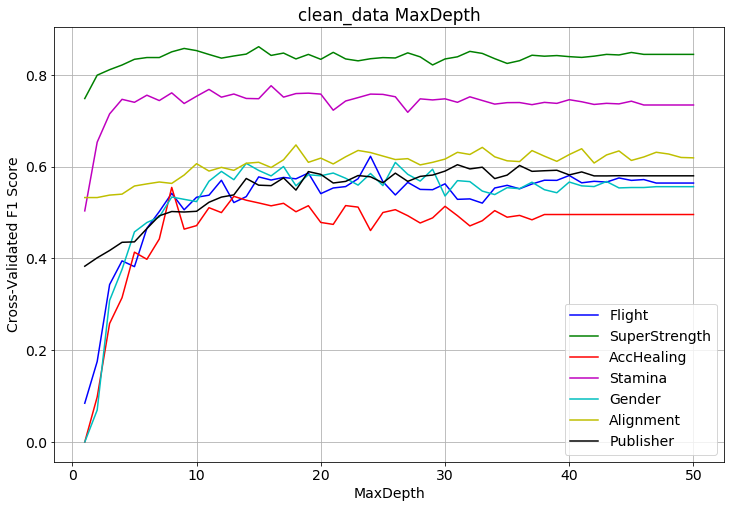

In [19]:
# Plotting Flight MaxDepth 

plt.figure(figsize=[12,8])
plt.rc('font', size=14)
plt.plot(depth_range, flightMD_F1.cv_results_['mean_test_score'], 'b-', label="Flight") 
plt.plot(depth_range, strMD_F1.cv_results_['mean_test_score'], 'g-', label="SuperStrength") 
plt.plot(depth_range, healMD_F1.cv_results_['mean_test_score'], 'r-', label="AccHealing") 
plt.plot(depth_range, stamMD_F1.cv_results_['mean_test_score'], 'm-', label="Stamina")
plt.plot(depth_range, genderMD_F1.cv_results_['mean_test_score'], 'c-', label="Gender") 
plt.plot(depth_range, alignMD_F1.cv_results_['mean_test_score'], 'y-', label="Alignment") 
plt.plot(depth_range, pubMD_F1.cv_results_['mean_test_score'], 'k-', label="Publisher") 



plt.xlabel('MaxDepth')
plt.ylabel('Cross-Validated F1 Score')
plt.title('clean_data MaxDepth')
plt.legend()
plt.grid()
plt.savefig('clean_data_MaxDepth.png')

print('\nFlight :', flightMD_F1.best_params_)
print('\nSuper Strength :', strMD_F1.best_params_)
print('\nAccelerated Healing :', healMD_F1.best_params_)
print('\nStamina :', stamMD_F1.best_params_)




Flight : {'n_estimators': 200}

Super Strength : {'n_estimators': 64}

Accelerated Healing : {'n_estimators': 100}

Stamina : {'n_estimators': 100}


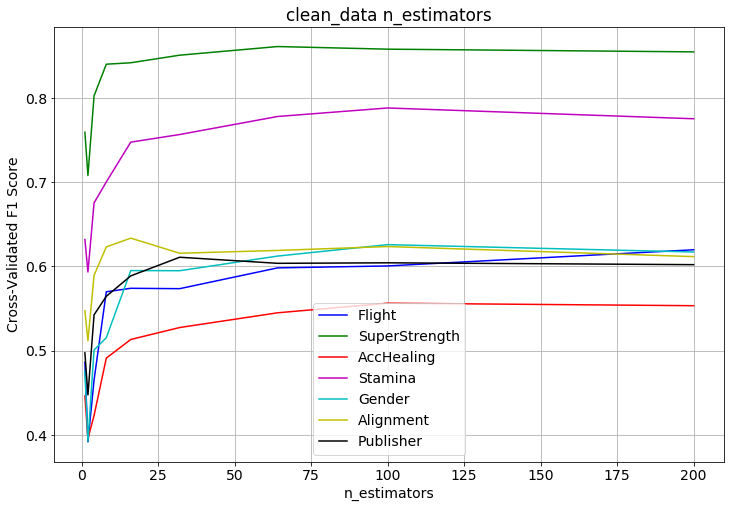

In [20]:
# Plotting Flight N_Esimators 

plt.figure(figsize=[12,8])
plt.rc('font', size=14)
plt.plot(estimators, flightEST_F1.cv_results_['mean_test_score'], 'b-', label="Flight") 
plt.plot(estimators, strEST_F1.cv_results_['mean_test_score'], 'g-', label="SuperStrength") 
plt.plot(estimators, healEST_F1.cv_results_['mean_test_score'], 'r-', label="AccHealing") 
plt.plot(estimators, stamEST_F1.cv_results_['mean_test_score'], 'm-', label="Stamina") 
plt.plot(estimators, genderEST_F1.cv_results_['mean_test_score'], 'c-', label="Gender") 
plt.plot(estimators, alignEST_F1.cv_results_['mean_test_score'], 'y-', label="Alignment") 
plt.plot(estimators, pubEST_F1.cv_results_['mean_test_score'], 'k-', label="Publisher") 

plt.xlabel('n_estimators')
plt.ylabel('Cross-Validated F1 Score')
plt.title('clean_data n_estimators')
plt.legend()
plt.grid()
plt.savefig('clean_data_N-Estimators.png')

print('\nFlight :', flightEST_F1.best_params_)
print('\nSuper Strength :', strEST_F1.best_params_)
print('\nAccelerated Healing :', healEST_F1.best_params_)
print('\nStamina :', stamEST_F1.best_params_)



Flight : {'min_samples_split': 0.1}

Super Strength : {'min_samples_split': 0.1}

Accelerated Healing : {'min_samples_split': 0.1}

Stamina : {'min_samples_split': 0.2}


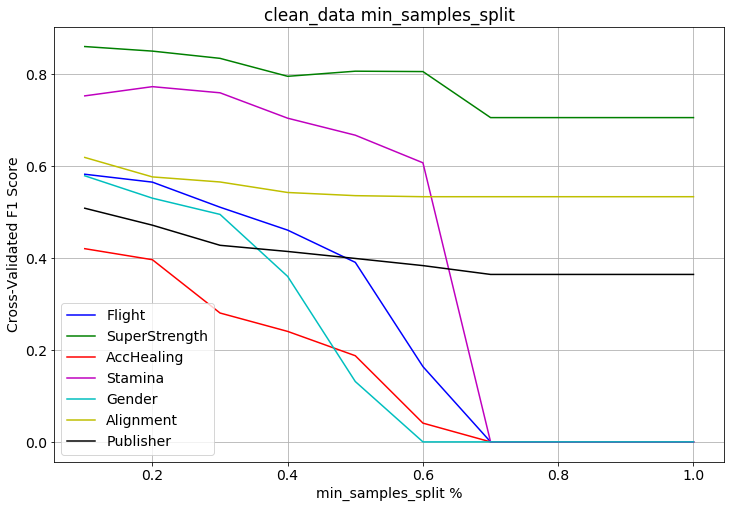

In [21]:
# Plotting Flight min_samples_split 

plt.figure(figsize=[12,8])
plt.rc('font', size=14)
plt.plot(samples_split, flightSPLIT_F1.cv_results_['mean_test_score'], 'b-', label="Flight") 
plt.plot(samples_split, strSPLIT_F1.cv_results_['mean_test_score'], 'g-', label="SuperStrength") 
plt.plot(samples_split, healSPLIT_F1.cv_results_['mean_test_score'], 'r-', label="AccHealing") 
plt.plot(samples_split, stamSPLIT_F1.cv_results_['mean_test_score'], 'm-', label="Stamina") 
plt.plot(samples_split, genderSPLIT_F1.cv_results_['mean_test_score'], 'c-', label="Gender") 
plt.plot(samples_split, alignSPLIT_F1.cv_results_['mean_test_score'], 'y-', label="Alignment") 
plt.plot(samples_split, pubSPLIT_F1.cv_results_['mean_test_score'], 'k-', label="Publisher") 

plt.xlabel('min_samples_split %')
plt.ylabel('Cross-Validated F1 Score')
plt.title('clean_data min_samples_split')
plt.legend()
plt.grid()
plt.savefig('clean_data_SPLIT.png')

print('\nFlight :', flightSPLIT_F1.best_params_)
print('\nSuper Strength :', strSPLIT_F1.best_params_)
print('\nAccelerated Healing :', healSPLIT_F1.best_params_)
print('\nStamina :', stamSPLIT_F1.best_params_)




Flight : {'max_features': 144}

Super Strength : {'max_features': 48}

Accelerated Healing : {'max_features': 106}

Stamina : {'max_features': 76}


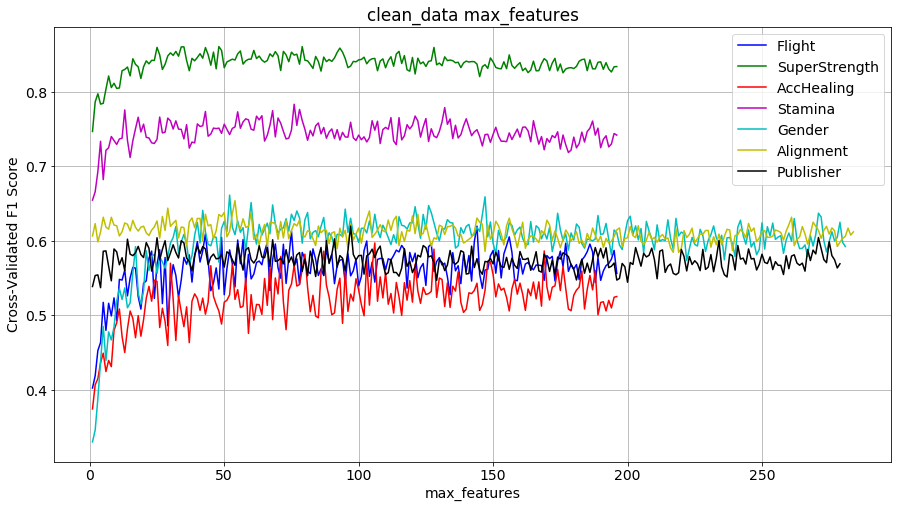

In [22]:
# Plotting Flight max_features 

plt.figure(figsize=[15,8])
plt.rc('font', size=14)
plt.plot(max_features, flightMAXF_F1.cv_results_['mean_test_score'], 'b-', label="Flight") 
plt.plot(max_features, strMAXF_F1.cv_results_['mean_test_score'], 'g-', label="SuperStrength") 
plt.plot(max_features, healMAXF_F1.cv_results_['mean_test_score'], 'r-', label="AccHealing") 
plt.plot(max_features, stamMAXF_F1.cv_results_['mean_test_score'], 'm-', label="Stamina") 
plt.plot(max_features_gender, genderMAXF_F1.cv_results_['mean_test_score'], 'c-', label="Gender") 
plt.plot(max_features_alignment, alignMAXF_F1.cv_results_['mean_test_score'], 'y-', label="Alignment") 
plt.plot(max_features_publisher, pubMAXF_F1.cv_results_['mean_test_score'], 'k-', label="Publisher") 

plt.xlabel('max_features')
plt.ylabel('Cross-Validated F1 Score')
plt.title('clean_data max_features')
plt.legend()
plt.grid()
plt.savefig('clean_data_MAXFEATURES.png')

print('\nFlight :', flightMAXF_F1.best_params_)
print('\nSuper Strength :', strMAXF_F1.best_params_)
print('\nAccelerated Healing :', healMAXF_F1.best_params_)
print('\nStamina :', stamMAXF_F1.best_params_)


In [23]:
# GridSearch for clean_data_grouped

rfc = RandomForestClassifier(random_state=1)
max_features = list(range(1,(clean_data_grouped.shape[1]-1)))

# Flight Grouped
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
flightGroupedMD_F1 = grid.fit(XflightGrouped, yflightGrouped)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
flightGroupedEST_F1 = grid.fit(XflightGrouped, yflightGrouped)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
flightGroupedSPLIT_F1 = grid.fit(XflightGrouped, yflightGrouped)

parameters = dict(max_features=max_features)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
flightGroupedMAXF_F1 = grid.fit(XflightGrouped, yflightGrouped)


# Super Strength Grouped
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
strGroupedMD_F1 = grid.fit(XstrGrouped, ystrGrouped)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
strGroupedEST_F1 = grid.fit(XstrGrouped, ystrGrouped)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
strGroupedSPLIT_F1 = grid.fit(XstrGrouped, ystrGrouped)

parameters = dict(max_features=max_features)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
strGroupedMAXF_F1 = grid.fit(XstrGrouped, ystrGrouped)

# Acc Healing Grouped
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
healGroupedMD_F1 = grid.fit(XhealGrouped, yhealGrouped)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
healGroupedEST_F1 = grid.fit(XhealGrouped, yhealGrouped)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
healGroupedSPLIT_F1 = grid.fit(XhealGrouped, yhealGrouped)

parameters = dict(max_features=max_features)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
healGroupedMAXF_F1 = grid.fit(XhealGrouped, yhealGrouped)

# Stamina Grouped
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
stamGroupedMD_F1 = grid.fit(XstamGrouped, ystamGrouped)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
stamGroupedEST_F1 = grid.fit(XstamGrouped, ystamGrouped)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
stamGroupedSPLIT_F1 = grid.fit(XstamGrouped, ystamGrouped)

parameters = dict(max_features=max_features)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
stamGroupedMAXF_F1 = grid.fit(XstamGrouped, ystamGrouped)

# Gender Grouped
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
genderGroupedMD_F1 = grid.fit(XgenderGrouped, ygenderGrouped)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
genderGroupedEST_F1 = grid.fit(XgenderGrouped, ygenderGrouped)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
genderGroupedSPLIT_F1 = grid.fit(XgenderGrouped, ygenderGrouped)

max_features_grouped_gender = list(range(1,clean_data_grouped_gender.shape[1]))
parameters = dict(max_features=max_features_grouped_gender)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1', n_jobs=-1)
genderGroupedMAXF_F1 = grid.fit(XgenderGrouped, ygenderGrouped)

# Alignment Grouped
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
alignGroupedMD_F1 = grid.fit(XalignGrouped, yalignGrouped)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
alignGroupedEST_F1 = grid.fit(XalignGrouped, yalignGrouped)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
alignGroupedSPLIT_F1 = grid.fit(XalignGrouped, yalignGrouped)

max_features_grouped_alignment = list(range(1,clean_data_grouped_alignment.shape[1]))
parameters = dict(max_features=max_features_grouped_alignment)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
alignGroupedMAXF_F1 = grid.fit(XalignGrouped, yalignGrouped)

# Publisher Grouped
parameters = dict(max_depth=depth_range)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
pubGroupedMD_F1 = grid.fit(XpubGrouped, ypubGrouped)

parameters = dict(n_estimators=estimators)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
pubGroupedEST_F1 = grid.fit(XpubGrouped, ypubGrouped)

parameters = dict(min_samples_split=samples_split)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
pubGroupedSPLIT_F1 = grid.fit(XpubGrouped, ypubGrouped)

max_features_grouped_publisher = list(range(1,clean_data_grouped_publisher.shape[1]))
parameters = dict(max_features=max_features_grouped_publisher)
grid = GridSearchCV(rfc, parameters, cv=6, scoring='f1_weighted', n_jobs=-1)
pubGroupedMAXF_F1 = grid.fit(Xpub, ypub)

C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to Fa

C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gboan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to Fa


Flight : {'max_depth': 14}

Super Strength : {'max_depth': 7}

Accelerated Healing : {'max_depth': 8}

Stamina : {'max_depth': 13}


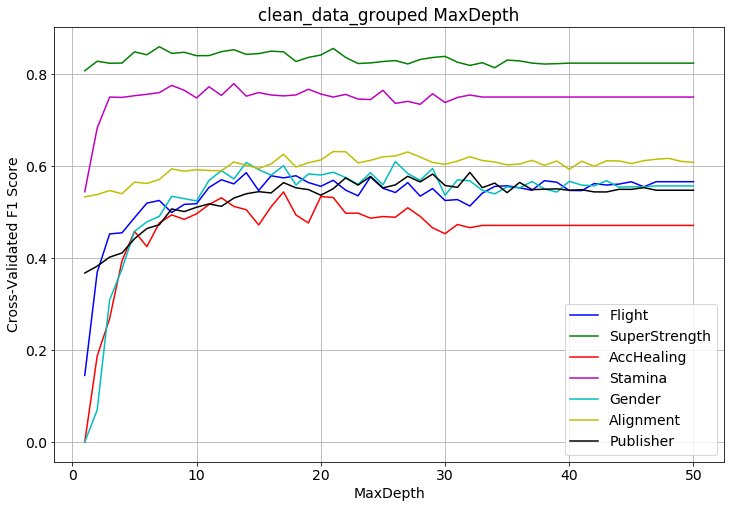

In [28]:
# Plotting Flight MaxDepth 

plt.figure(figsize=[12,8])
plt.rc('font', size=14)
plt.plot(depth_range, flightGroupedMD_F1.cv_results_['mean_test_score'], 'b-', label="Flight") 
plt.plot(depth_range, strGroupedMD_F1.cv_results_['mean_test_score'], 'g-', label="SuperStrength") 
plt.plot(depth_range, healGroupedMD_F1.cv_results_['mean_test_score'], 'r-', label="AccHealing") 
plt.plot(depth_range, stamGroupedMD_F1.cv_results_['mean_test_score'], 'm-', label="Stamina") 
plt.plot(depth_range, genderGroupedMD_F1.cv_results_['mean_test_score'], 'c-', label="Gender") 
plt.plot(depth_range, alignGroupedMD_F1.cv_results_['mean_test_score'], 'y-', label="Alignment") 
plt.plot(depth_range, pubGroupedMD_F1.cv_results_['mean_test_score'], 'k-', label="Publisher") 

plt.xlabel('MaxDepth')
plt.ylabel('Cross-Validated F1 Score')
plt.title('clean_data_grouped MaxDepth')
plt.legend()
plt.grid()
plt.savefig('clean_data_grouped_MaxDepth.png')

print('\nFlight :', flightGroupedMD_F1.best_params_)
print('\nSuper Strength :', strGroupedMD_F1.best_params_)
print('\nAccelerated Healing :', healMD_F1.best_params_)
print('\nStamina :', stamGroupedMD_F1.best_params_)




Flight : {'n_estimators': 200}

Super Strength : {'n_estimators': 100}

Accelerated Healing : {'n_estimators': 200}

Stamina : {'n_estimators': 32}


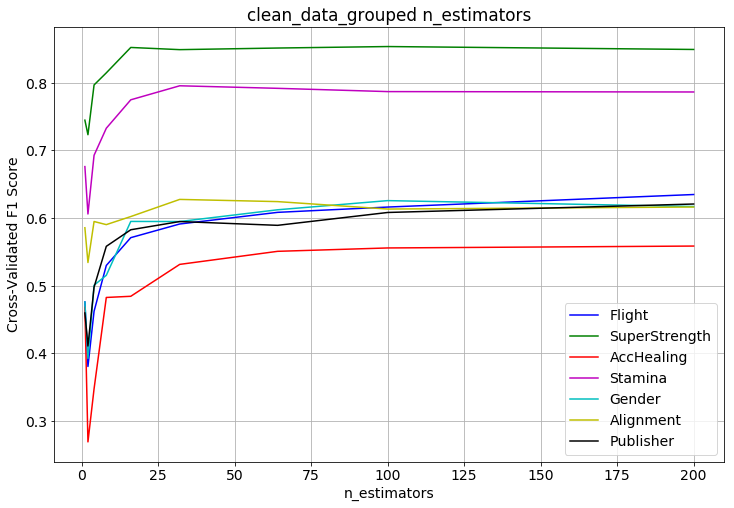

In [29]:
# Plotting Flight N_Esimators 

plt.figure(figsize=[12,8])
plt.rc('font', size=14)
plt.plot(estimators, flightGroupedEST_F1.cv_results_['mean_test_score'], 'b-', label="Flight") 
plt.plot(estimators, strGroupedEST_F1.cv_results_['mean_test_score'], 'g-', label="SuperStrength") 
plt.plot(estimators, healGroupedEST_F1.cv_results_['mean_test_score'], 'r-', label="AccHealing") 
plt.plot(estimators, stamGroupedEST_F1.cv_results_['mean_test_score'], 'm-', label="Stamina") 
plt.plot(estimators, genderGroupedEST_F1.cv_results_['mean_test_score'], 'c-', label="Gender") 
plt.plot(estimators, alignGroupedEST_F1.cv_results_['mean_test_score'], 'y-', label="Alignment") 
plt.plot(estimators, pubGroupedEST_F1.cv_results_['mean_test_score'], 'k-', label="Publisher") 

plt.xlabel('n_estimators')
plt.ylabel('Cross-Validated F1 Score')
plt.title('clean_data_grouped n_estimators')
plt.legend()
plt.grid()
plt.savefig('clean_data_grouped_N-Estimators.png')

print('\nFlight :', flightGroupedEST_F1.best_params_)
print('\nSuper Strength :', strGroupedEST_F1.best_params_)
print('\nAccelerated Healing :', healGroupedEST_F1.best_params_)
print('\nStamina :', stamGroupedEST_F1.best_params_)



Flight : {'min_samples_split': 0.1}

Super Strength : {'min_samples_split': 0.1}

Accelerated Healing : {'min_samples_split': 0.1}

Stamina : {'min_samples_split': 0.2}


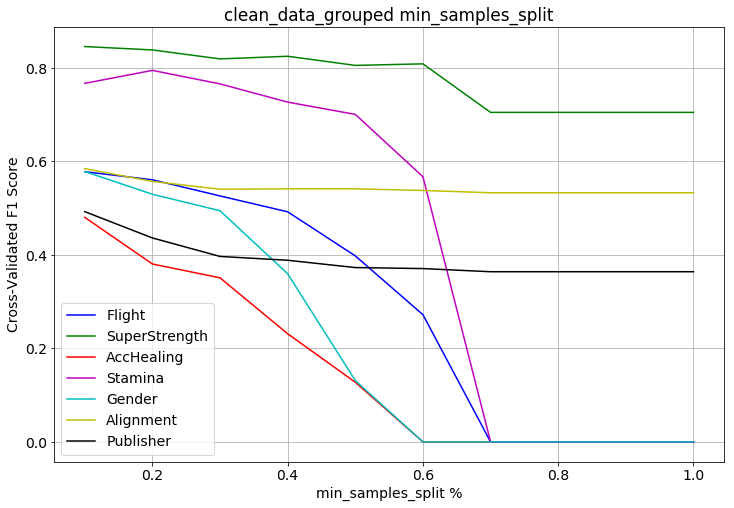

In [30]:
# Plotting Flight min_samples_split 

plt.figure(figsize=[12,8])
plt.rc('font', size=14)
plt.plot(samples_split, flightGroupedSPLIT_F1.cv_results_['mean_test_score'], 'b-', label="Flight") 
plt.plot(samples_split, strGroupedSPLIT_F1.cv_results_['mean_test_score'], 'g-', label="SuperStrength") 
plt.plot(samples_split, healGroupedSPLIT_F1.cv_results_['mean_test_score'], 'r-', label="AccHealing") 
plt.plot(samples_split, stamGroupedSPLIT_F1.cv_results_['mean_test_score'], 'm-', label="Stamina") 
plt.plot(samples_split, genderGroupedSPLIT_F1.cv_results_['mean_test_score'], 'c-', label="Gender") 
plt.plot(samples_split, alignGroupedSPLIT_F1.cv_results_['mean_test_score'], 'y-', label="Alignment") 
plt.plot(samples_split, pubGroupedSPLIT_F1.cv_results_['mean_test_score'], 'k-', label="Publisher") 

plt.xlabel('min_samples_split %')
plt.ylabel('Cross-Validated F1 Score')
plt.title('clean_data_grouped min_samples_split')
plt.legend()
plt.grid()
plt.savefig('clean_data_grouped_SPLIT.png')

print('\nFlight :', flightGroupedSPLIT_F1.best_params_)
print('\nSuper Strength :', strGroupedSPLIT_F1.best_params_)
print('\nAccelerated Healing :', healGroupedSPLIT_F1.best_params_)
print('\nStamina :', stamGroupedSPLIT_F1.best_params_)




Flight : {'max_features': 100}

Super Strength : {'max_features': 43}

Accelerated Healing : {'max_features': 132}

Stamina : {'max_features': 87}


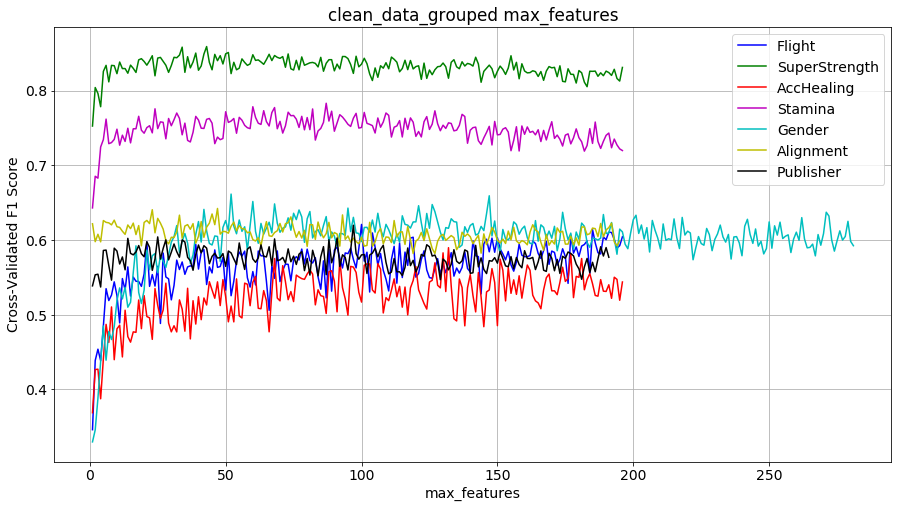

In [32]:
# Plotting Flight max_features grouped

plt.figure(figsize=[15,8])
plt.rc('font', size=14)
plt.plot(max_features, flightGroupedMAXF_F1.cv_results_['mean_test_score'], 'b-', label="Flight") 
plt.plot(max_features, strGroupedMAXF_F1.cv_results_['mean_test_score'], 'g-', label="SuperStrength") 
plt.plot(max_features, healGroupedMAXF_F1.cv_results_['mean_test_score'], 'r-', label="AccHealing") 
plt.plot(max_features, stamGroupedMAXF_F1.cv_results_['mean_test_score'], 'm-', label="Stamina") 
plt.plot(max_features_grouped_gender, genderGroupedMAXF_F1.cv_results_['mean_test_score'], 'c-', label="Gender") 
plt.plot(max_features_grouped_alignment, alignGroupedMAXF_F1.cv_results_['mean_test_score'], 'y-', label="Alignment") 
plt.plot(max_features_grouped_publisher, pubGroupedMAXF_F1.cv_results_['mean_test_score'], 'k-', label="Publisher") 

plt.xlabel('max_features')
plt.ylabel('Cross-Validated F1 Score')
plt.title('clean_data_grouped max_features')
plt.legend()
plt.grid()
plt.savefig('clean_data_grouped_MAXFEATURES.png')

print('\nFlight :', flightGroupedMAXF_F1.best_params_)
print('\nSuper Strength :', strGroupedMAXF_F1.best_params_)
print('\nAccelerated Healing :', healGroupedMAXF_F1.best_params_)
print('\nStamina :', stamGroupedMAXF_F1.best_params_)
